# Classifying newswires
Multiclass classification:
* single-label, multicalss classification: each data point should be classified into only one category 
* multilabel, multicalss classification

Reuters dataset: short newswires, 46 classes

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Decodeing newswires back to text:

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[10]

3

Encoding the data:

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Encoding for the labels: one-hot encoding/categorical encoding:

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

OR use built-in function:

In [12]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Building the network:

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
# softmax: probability distribution over the 46 different classes

Compiling the model:

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Setting a validation set:

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Trining the model:

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 41ms/step - loss: 2.6257 - accuracy: 0.5371 - val_loss: 1.7433 - val_accuracy: 0.6310
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 1.4214 - accuracy: 0.7035 - val_loss: 1.3049 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 25ms/step - loss: 1.0474 - accuracy: 0.7800 - val_loss: 1.1418 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 0s 26ms/step - loss: 0.8265 - accuracy: 0.8271 - val_loss: 1.0442 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 0.6590 - accuracy: 0.8634 - val_loss: 0.9863 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.5265 - accuracy: 0.8931 - val_loss: 0.9281 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 25ms/step - loss: 0.4251 - accuracy: 0.9136 - val_loss: 0.9059 - val_accuracy: 0.8030
Epoch 8/20
16

Plotting the loss and accuracy curves:

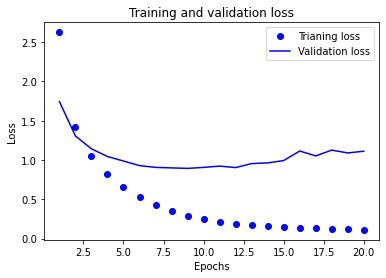

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Trianing loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

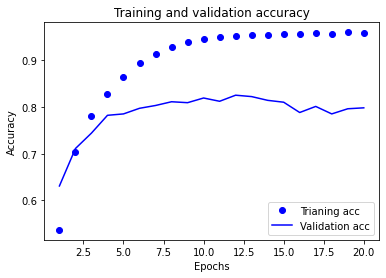

In [20]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Trianing acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Retraining a model from scratch:

In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 30ms/step - loss: 2.6862 - accuracy: 0.5358 - val_loss: 1.7366 - val_accuracy: 0.6370
Epoch 2/9
16/16 [==============================] - 0s 23ms/step - loss: 1.4131 - accuracy: 0.7082 - val_loss: 1.3070 - val_accuracy: 0.7150
Epoch 3/9
16/16 [==============================] - 0s 24ms/step - loss: 1.0525 - accuracy: 0.7745 - val_loss: 1.1431 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 0s 25ms/step - loss: 0.8226 - accuracy: 0.8229 - val_loss: 1.0575 - val_accuracy: 0.7640
Epoch 5/9
16/16 [==============================] - 0s 25ms/step - loss: 0.6552 - accuracy: 0.8622 - val_loss: 0.9748 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 0s 26ms/step - loss: 0.5179 - accuracy: 0.8903 - val_loss: 0.9446 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 0s 25ms/step - loss: 0.4158 - accuracy: 0.9117 - val_loss: 0.9240 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [22]:
results

[0.9974163174629211, 0.7894033789634705]

A random baseline:

In [23]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

Generating prediction:

In [24]:
predictions = model.predict(x_test)

In [25]:
predictions[0].shape

(46,)

In [26]:
np.sum(predictions[0])

0.9999998

In [27]:
np.argmax(predictions[0])

3

A model with an information bottlneck:

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 3.4600 - accuracy: 0.4436 - val_loss: 3.1661 - val_accuracy: 0.5150
Epoch 2/20
63/63 [==============================] - 1s 13ms/step - loss: 2.9713 - accuracy: 0.5479 - val_loss: 2.8884 - val_accuracy: 0.5610
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 2.6870 - accuracy: 0.5948 - val_loss: 2.7132 - val_accuracy: 0.5870
Epoch 4/20
63/63 [==============================] - 1s 12ms/step - loss: 2.4549 - accuracy: 0.6413 - val_loss: 2.5682 - val_accuracy: 0.6160
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 2.2797 - accuracy: 0.4531 - val_loss: 2.4392 - val_accuracy: 0.3610
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 2.0843 - accuracy: 0.3760 - val_loss: 2.2350 - val_accuracy: 0.3530
Epoch 7/20
63/63 [==============================] - 1s 12ms/step - loss: 1.6966 - accuracy: 0.4840 - val_loss: 1.6747 - val_accuracy: 0.6260
Epoch 8/20
63

The accuracy drops with an information bottleneck!